In [31]:
#import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
data = pd.read_csv(r"D:\ml\canada_per_capita.csv")

In [4]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
 2   Unnamed: 2               0 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [5]:
# Preview the dataset
data.head()

,year,per capita income (US$),Unnamed: 2
0,1970,3399.299037,NaN
1,1971,3768.297935,NaN
2,1972,4251.175484,NaN
3,1973,4804.463248,NaN
4,1974,5576.514583,NaN


In [6]:
# Drop unnecessary column if it exists
if 'Unnamed: 2' in data.columns:
    data = data.drop(columns=['Unnamed: 2'])

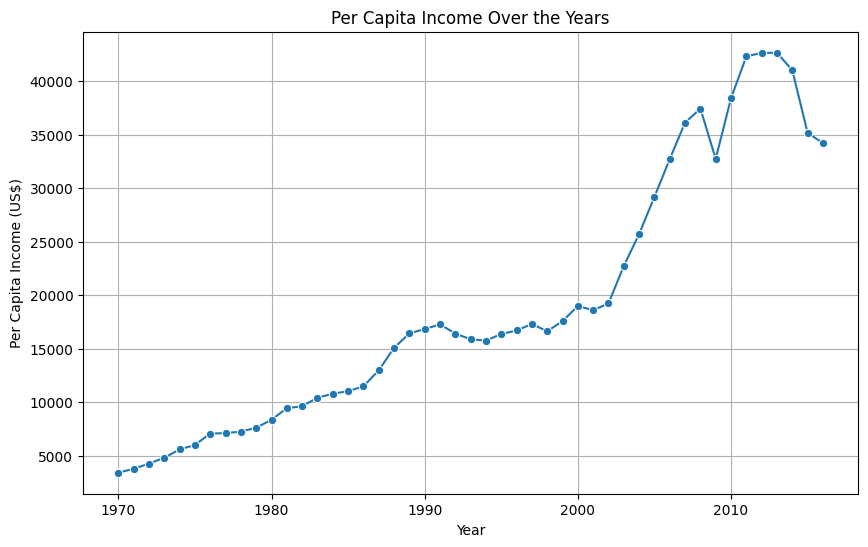

In [7]:
# Visualize per capita income over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='per capita income (US$)', data=data, marker='o')
plt.title('Per Capita Income Over the Years')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.grid(True)
plt.show()

In [8]:
# Prepare the data
X = data[['year']]
y = data['per capita income (US$)']

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize regressors
linear_regressor = LinearRegression()
tree_regressor = DecisionTreeRegressor(random_state=42)
forest_regressor = RandomForestRegressor(random_state=42)

In [11]:
# Train models
linear_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Make predictions
y_pred_linear = linear_regressor.predict(X_test)
y_pred_tree = tree_regressor.predict(X_test)
y_pred_forest = forest_regressor.predict(X_test)

In [15]:
# Evaluate models
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [16]:
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)

In [17]:
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)

In [18]:
# Print evaluation results
print("Linear Regression: MAE =", mae_linear, ", MSE =", mse_linear)
print("Decision Tree Regressor: MAE =", mae_tree, ", MSE =", mse_tree)
print("Random Forest Regressor: MAE =", mae_forest, ", MSE =", mse_forest)

Linear Regression: MAE = 3240.91399747583 , MSE = 15147815.5477862
Decision Tree Regressor: MAE = 1192.5007640000006 , MSE = 3772231.6413273066
Random Forest Regressor: MAE = 1078.6952601020025 , MSE = 3032493.9564395067


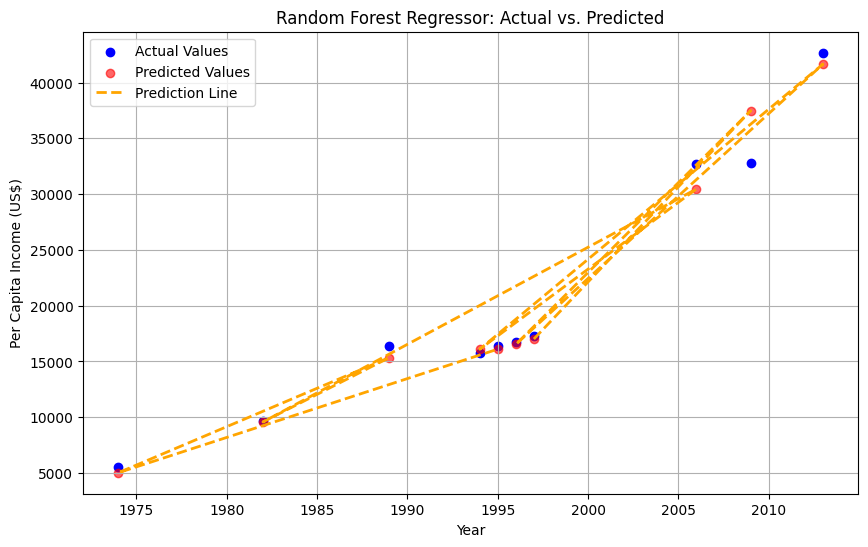

In [19]:
# Visualize Random Forest results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred_forest, color='red', label='Predicted Values', alpha=0.6)
plt.plot(X_test, y_pred_forest, color='orange', linewidth=2, linestyle='--', label='Prediction Line')
plt.title('Random Forest Regressor: Actual vs. Predicted')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.legend()
plt.grid(True)
plt.show()

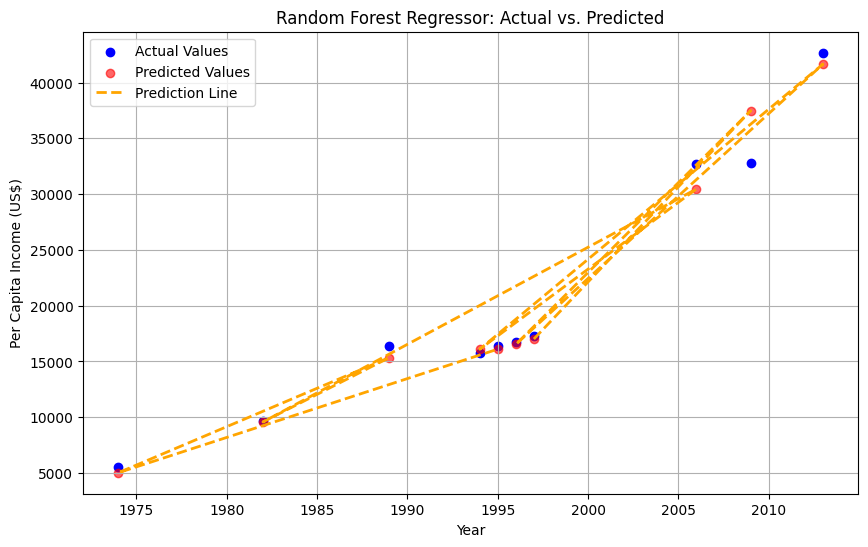

In [20]:
# Visualize Random Forest results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred_forest, color='red', label='Predicted Values', alpha=0.6)
plt.plot(X_test, y_pred_forest, color='orange', linewidth=2, linestyle='--', label='Prediction Line')
plt.title('Random Forest Regressor: Actual vs. Predicted')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Perform hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [22]:
grid_search = GridSearchCV(estimator=forest_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_absolute_error')

In [23]:
# Best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

In [24]:
print("Best Parameters:", best_params)
print("Best MAE Score (Validation):", best_score)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best MAE Score (Validation): 1288.8484850282225


In [25]:
# Train the tuned model
best_forest_regressor = grid_search.best_estimator_
best_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [26]:
# Evaluate the tuned model
y_pred_best_forest = best_forest_regressor.predict(X_test)

In [28]:
mae_best_forest = mean_absolute_error(y_test, y_pred_best_forest)
mse_best_forest = mean_squared_error(y_test, y_pred_best_forest)

In [29]:
print("Tuned Random Forest Regressor: MAE =", mae_best_forest, ", MSE =", mse_best_forest)

Tuned Random Forest Regressor: MAE = 1027.1063403719859 , MSE = 2900390.5548641053


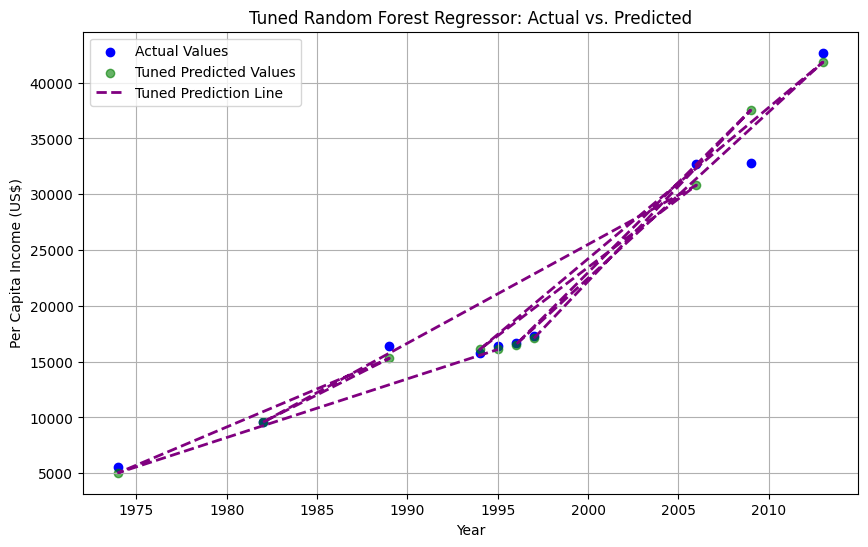

In [30]:
# Visualize the tuned model results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred_best_forest, color='green', label='Tuned Predicted Values', alpha=0.6)
plt.plot(X_test, y_pred_best_forest, color='purple', linewidth=2, linestyle='--', label='Tuned Prediction Line')
plt.title('Tuned Random Forest Regressor: Actual vs. Predicted')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.legend()
plt.grid(True)
plt.show()